In [33]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [10,6]

In [2]:
dataset = pd.read_csv('https://raw.githubusercontent.com/amandeepsingh1111/Clustering/master/Data/Mall_Customers.csv')

In [3]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
X = dataset.iloc[:,[2,4]].values

In [5]:
print(X.shape)
X[:5]

(200, 2)


array([[19, 39],
       [21, 81],
       [20,  6],
       [23, 77],
       [31, 40]])

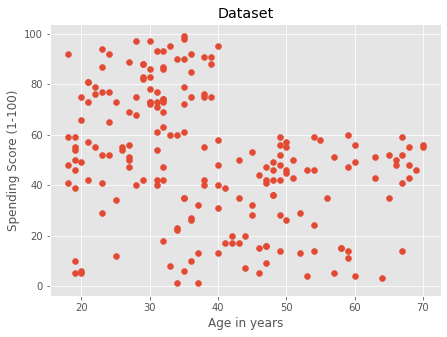

In [34]:
plt.figure(figsize=(7,5))
plt.title('Dataset')
plt.scatter(dataset['Age'], dataset['Spending Score (1-100)'])
plt.xlabel("Age in years")
plt.ylabel('Spending Score (1-100)')
plt.show()

In [7]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 11)

for k in K:
	# Building and fitting the model
	kmeanModel = KMeans(n_clusters=k).fit(X)
	kmeanModel.fit(X)

	distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
										'euclidean'), axis=1)) / X.shape[0])
	inertias.append(kmeanModel.inertia_)

	mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
								'euclidean'), axis=1)) / X.shape[0]
	mapping2[k] = kmeanModel.inertia_


In [8]:
### Distortion mapping with n clusters
for key, val in mapping1.items():
	print(f'{key} : {val}')


1 : 26.584293634469137
2 : 17.50414490737286
3 : 13.580800827443024
4 : 10.82166638302163
5 : 9.863859862118689
6 : 9.124824634581215
7 : 7.9518456394642785
8 : 7.3726944750060515
9 : 6.9594057221934555
10 : 6.550920211492976


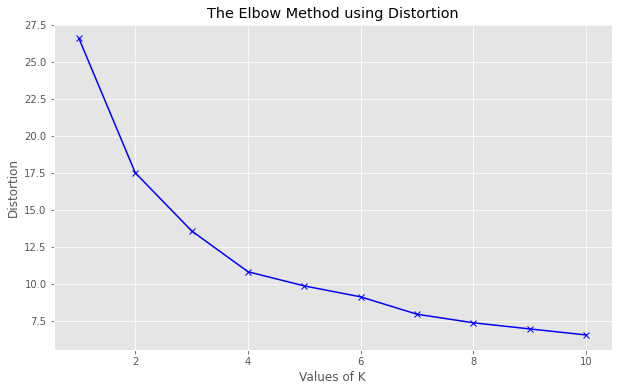

In [35]:
# Plot Elbow Graph using distortion
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [10]:
### Inertia mapping with n clusters

for key, val in mapping2.items():
	print(f'{key} : {val}')


1 : 171535.5
2 : 75949.15601023017
3 : 45840.67661610867
4 : 28165.58356662934
5 : 23810.462233071365
6 : 19492.611301496087
7 : 15514.19313435103
8 : 13054.172145982673
9 : 11512.14509663582
10 : 10271.922412531108


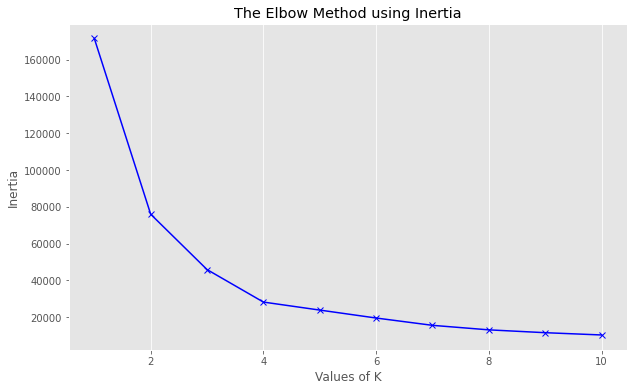

In [36]:
## Plot Elbow Graph using Inertia
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.grid(axis='y')
plt.show()

In [12]:
from sklearn.cluster import KMeans
wcss = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X) 
    wcss.append(kmeans.inertia_)

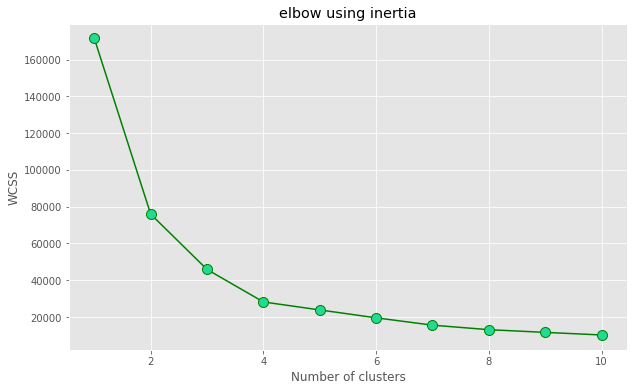

In [54]:
plt.plot(range(1, 11), wcss, 'g.-', markersize=20, mfc="#22da94")
plt.xlabel('Number of clusters')
plt.title("elbow using inertia")
plt.ylabel('WCSS') 
plt.show()

## select clusters = 4

In [14]:
kmeans = KMeans(n_clusters = 4, init = "k-means++", random_state = 42)
y_kmeans = kmeans.fit_predict(X)

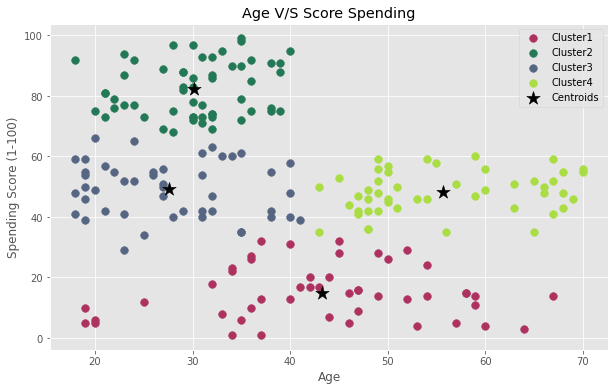

In [58]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 60, c = '#ad3260', label = 'Cluster1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 60, c = '#237855', label = 'Cluster2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 60, c = '#566682', label = 'Cluster3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 60, c = '#aadd44', label = 'Cluster4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'black', label = 'Centroids', marker='*')
plt.xlabel('Age')
plt.title('Age V/S Score Spending')
plt.ylabel('Spending Score (1-100)')
plt.legend() 

plt.show()

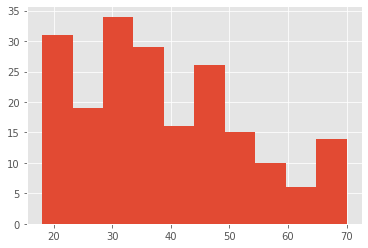

In [28]:
plt.hist(X[:,0]);